In [3]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from directed_graph_generators.directed_stochastic_block_model import DirectedStochasticBlockModel

from helpers.wasserstein_distance import wasserstein_distance

In [ ]:
#create a directed stochastic block model
n = 100
p = 0.5
q = 0.5
#3 x 3 block model
F = [[0.5,0.8,0.2],[0.2,0.5,0.8],[0.8,0.2,0.5]]
dsbm = DirectedStochasticBlockModel(k=3, N=n, p=p, q=q, F=F)
A = dsbm.adjacency_matrix

In [2]:
# for each pair of nodes, compute the shortest distance between them in the graph and store in array D
def shortest_path_length(A):
    n = A.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i,j] = np.inf
            if i == j:
                D[i,j] = 0
            if A[i,j] == 1:
                D[i,j] = 1
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i,j] > D[i,k] + D[k,j]:
                    D[i,j] = D[i,k] + D[k,j]
    return D

D = shortest_path_length(A)

NameError: name 'A' is not defined

In [ ]:
# with t =3, compute random walk distributions for P = D^(-1)A for each node
Deg = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(Deg) @ A
P = np.linalg.matrix_power(P, 3)
random_walks = []
for i in range(n):
    random_walks.append(P[i,:].reshape(-1,1))

In [ ]:
wasserstein_distances = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        if i != j:
            wasserstein_distances[i,j] = wasserstein_distance(random_walks[i], random_walks[j], D)
            wasserstein_distances[j,i] = wasserstein_distances[j,i]

In [ ]:
wasserstein_distances.to_numpy()

In [ ]:
wasserstein_distances_sym = wasserstein_distances + np.transpose(wasserstein_distances)
sns.heatmap(wasserstein_distances_sym)

In [ ]:
#eigenvalues of P
eigvals, eigvecs = np.linalg.eig(P)
np.abs(eigvals)

In [5]:
#create a directed stochastic block model
n = 100
p = 0.5
q = 0.5
#3 x 3 block model
F = [[0.5,0.8,0.8,0.8],
     [0.2,0.5,0.8,0.5],
     [0.2,0.2,0.5,0.8],
     [0.2,0.5,0.2,0.5]]
dsbm = DirectedStochasticBlockModel(k=4, N=n, p=p, q=q, F=F)
A = dsbm.adjacency_matrix

In [7]:
# for each pair of nodes, compute the shortest distance between them in the graph and store in array D
def shortest_path_length(A):
    n = A.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D[i,j] = np.inf
            if i == j:
                D[i,j] = 0
            if A[i,j] == 1:
                D[i,j] = 1
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i,j] > D[i,k] + D[k,j]:
                    D[i,j] = D[i,k] + D[k,j]
    return D

D = shortest_path_length(A)

In [8]:
# with t =3, compute random walk distributions for P = D^(-1)A for each node
Deg = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(Deg) @ A
P = np.linalg.matrix_power(P, 3)
random_walks = []
for i in range(n):
    random_walks.append(P[i,:].reshape(-1,1))

In [9]:
wasserstein_distances = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        if i != j:
            wasserstein_distances[i,j] = wasserstein_distance(random_walks[i], random_walks[j], D)
            wasserstein_distances[j,i] = wasserstein_distances[j,i]

<AxesSubplot: >

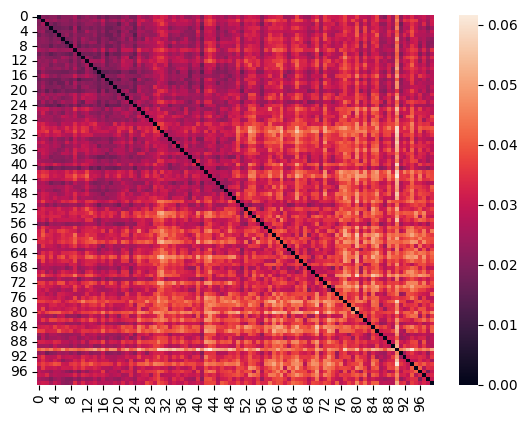

In [10]:
wasserstein_distances_sym = wasserstein_distances + np.transpose(wasserstein_distances)
sns.heatmap(wasserstein_distances_sym)

In [11]:
#Trying again with a higher number of walks
# with t =3, compute random walk distributions for P = D^(-1)A for each node
Deg = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(Deg) @ A
P = np.linalg.matrix_power(P, 5)
random_walks = []
for i in range(n):
    random_walks.append(P[i,:].reshape(-1,1))

wasserstein_distances = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        if i != j:
            wasserstein_distances[i,j] = wasserstein_distance(random_walks[i], random_walks[j], D)
            wasserstein_distances[j,i] = wasserstein_distances[j,i]

<AxesSubplot: >

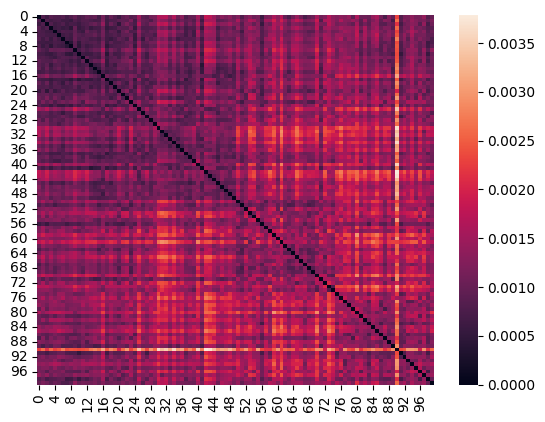

In [12]:
wasserstein_distances_sym = wasserstein_distances + np.transpose(wasserstein_distances)
sns.heatmap(wasserstein_distances_sym)

In [13]:
#Trying again with a higher number of walks
# with t =3, compute random walk distributions for P = D^(-1)A for each node
Deg = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(Deg) @ A
P = np.linalg.matrix_power(P, 4)
random_walks = []
for i in range(n):
    random_walks.append(P[i,:].reshape(-1,1))

wasserstein_distances = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        if i != j:
            wasserstein_distances[i,j] = wasserstein_distance(random_walks[i], random_walks[j], D)
            wasserstein_distances[j,i] = wasserstein_distances[j,i]

<AxesSubplot: >

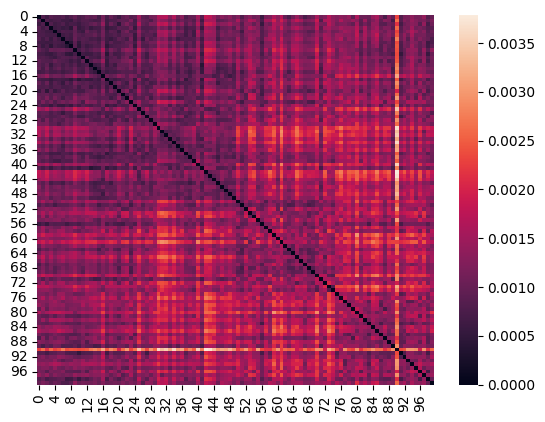

In [14]:
wasserstein_distances_sym = wasserstein_distances + np.transpose(wasserstein_distances)
sns.heatmap(wasserstein_distances_sym)

<AxesSubplot: >

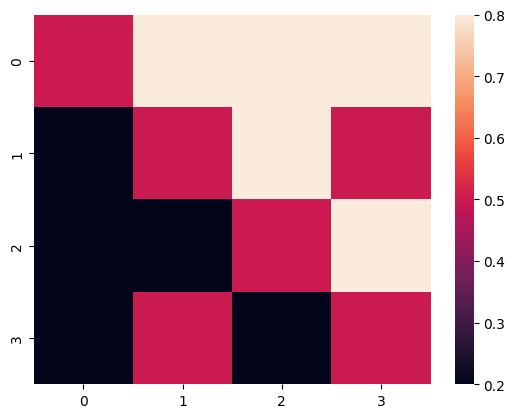

In [15]:
sns.heatmap(F)

In [16]:
#Trying again with a higher number of walks
# with t =3, compute random walk distributions for P = D^(-1)A for each node
Deg = np.diag(np.sum(A, axis=1))
P = np.linalg.inv(Deg) @ A
P = np.linalg.matrix_power(P, 10)
random_walks = []
for i in range(n):
    random_walks.append(P[i,:].reshape(-1,1))

wasserstein_distances = np.zeros((n,n))
for i in range(n):
    for j in range(i,n):
        if i != j:
            wasserstein_distances[i,j] = wasserstein_distance(random_walks[i], random_walks[j], D)

<AxesSubplot: >

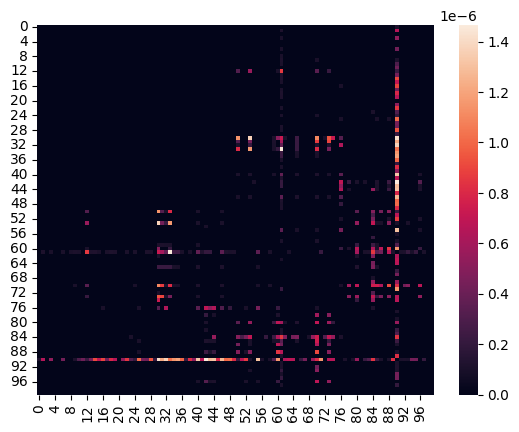

In [17]:
wasserstein_distances_sym = wasserstein_distances + np.transpose(wasserstein_distances)
sns.heatmap(wasserstein_distances_sym)

In [23]:
# Apply spectral clustering to A
from clustering_algorithms.zanetti_clustering import DSBM_Clustering_Zanetti

clusters, eigenvecs  = DSBM_Clustering_Zanetti(A,4,2,method='adjacency',normalize=True)
clusters

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 3, 0, 3, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [24]:
# compute ARI
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(clusters, dsbm.correct_clusters)

0.5089891197494043

<AxesSubplot: >

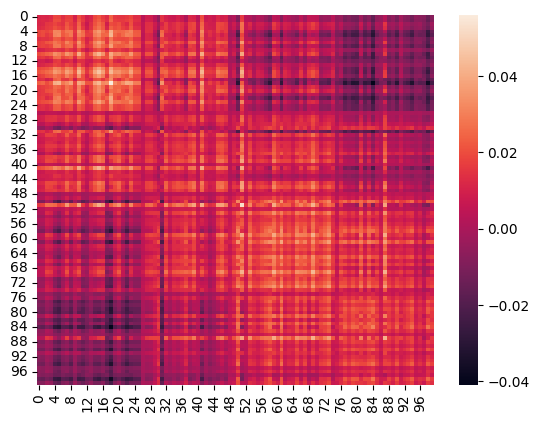

In [26]:
sns.heatmap(eigenvecs)

In [41]:
from clustering_algorithms.exponential_clustering import Exponential_Clustering_no_evecs

clusters_exp, cos_A = Exponential_Clustering_no_evecs(A,4,t=20)

In [42]:
adjusted_rand_score(clusters_exp, dsbm.correct_clusters)

0.49029441658196843

<AxesSubplot: >

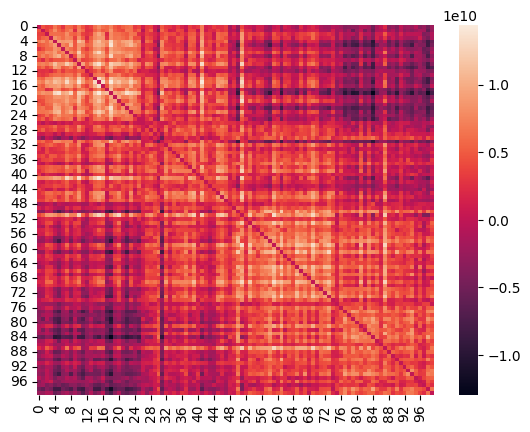

In [43]:
np.fill_diagonal(cos_A,0)
sns.heatmap(cos_A)

In [73]:
A_hat = A
#A = (A + A.T)
A_herm = (A_hat - A_hat.T)*1j
# normalize adjacency matrix
D = np.zeros(A_herm.shape)
np.fill_diagonal(D,[1/np.sqrt(d) for d in np.sum(np.abs(A_herm), axis=1) if d != 0])
A_herm = D @ A_herm @ D
eig_vals, eig_vecs = np.linalg.eig(A_herm)
#sorting according to largest in magnitude
idx = np.abs(eig_vals).argsort()[::-1]
eig_vec_first = eig_vecs[:,idx][:,0:1]

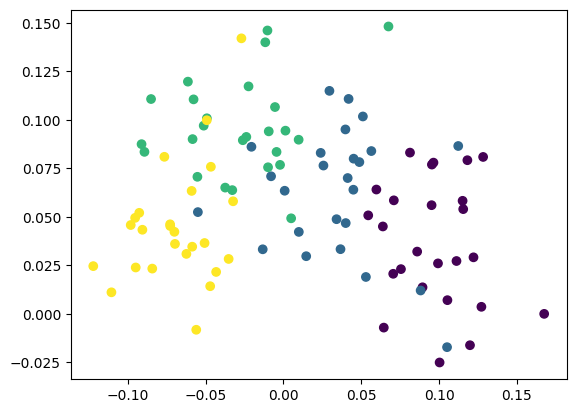

In [80]:
#plotting eig_vec_first and colouring by cluster
plt.scatter(eig_vec_first.real, eig_vec_first.imag, c=dsbm.correct_clusters)
